# Intent Classification

In [58]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation, Flatten, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.optimizers import Adam

In [59]:
# read into csv file
import os
os.chdir(r'C:\Users\apega\My py notes\Deep Learning with python\Other files\Intent classification Data')

df = pd.read_csv('train.csv')
df.head()

,sentence,BookRestaurant,GetWeather,PlayMusic,RateBook
0,book The Middle East restaurant in IN for noon,1,0,0,0
1,Book a table at T-Rex distant from Halsey St.,1,0,0,0
2,I'd like to eat at a taverna that serves chili...,1,0,0,0
3,I have a party of four in Japan and need a res...,1,0,0,0
4,Please make a restaurant reservation for somew...,1,0,0,0


In [60]:
# shuffle data
df = shuffle(df)
df.head()

,sentence,BookRestaurant,GetWeather,PlayMusic,RateBook
4337,Play a 1964 track from Shahram Nazeri on Pandora.,0,0,1,0
1767,book a spot for six in Greece,1,0,0,0
3703,"Is it going to be snowy in Concord, Utah?",0,1,0,0
1379,Book something at a highly rated and distant c...,1,0,0,0
446,Book a table for 10 at the Dunbrody Country Ho...,1,0,0,0


In [61]:
X_train = df["sentence"].fillna("fillna").values
y_train = df[["BookRestaurant", "GetWeather", "PlayMusic", "RateBook"]].values

In [62]:
X_train.shape, y_train.shape

((7929,), (7929, 4))

In [63]:
X_train[1], y_train[1] 

('book a spot for six in Greece', array([1, 0, 0, 0], dtype=int64))

# Preprocessing

In [64]:
text = X_train

In [65]:
Tokenizer = Tokenizer()

In [87]:
# text preprocessing
Tokenizer.fit_on_texts(text) 
Tokenizer_vocab_size = len(Tokenizer.word_index) 
Tokenizer_vocab_size

7521

In [67]:
X_train.shape, y_train.shape

((7929,), (7929, 4))

In [68]:
samples = 2500

X_train = X_train[samples:] 
y_train = y_train[samples:] 

X_val = X_train[:samples] 
y_val = y_train[:samples] 

In [69]:
X_train.shape, y_train.shape

((5429,), (5429, 4))

In [70]:
X_train_encoded_words = Tokenizer.texts_to_sequences(X_train)  # refer: https://stackoverflow.com/questions/54891464/is-it-better-to-keras-fit-to-text-on-the-entire-x-data-or-just-the-train-data
X_val_encoded_words = Tokenizer.texts_to_sequences(X_val)

In [71]:
X_train_encoded_padded_words = sequence.pad_sequences(X_train_encoded_words, maxlen = 100)  # refer: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
X_val_encoded_padded_words = sequence.pad_sequences(X_val_encoded_words, maxlen = 100)

X_train_encoded_padded_words.shape, X_val_encoded_padded_words.shape

((5429, 100), (2500, 100))

In [72]:
X_val_encoded_padded_words, X_train_encoded_padded_words

(array([[   0,    0,    0, ...,    3,  294,  744],
        [   0,    0,    0, ...,    7,   53,   30],
        [   0,    0,    0, ...,  320, 1091,  624],
        ...,
        [   0,    0,    0, ...,   47, 5760, 5761],
        [   0,    0,    0, ...,    3, 5762,  401],
        [   0,    0,    0, ...,    3,   39,  184]]),
 array([[   0,    0,    0, ...,    3,  294,  744],
        [   0,    0,    0, ...,    7,   53,   30],
        [   0,    0,    0, ...,  320, 1091,  624],
        ...,
        [   0,    0,    0, ...,   26,   14,  124],
        [   0,    0,    0, ...,  357, 1157,  311],
        [   0,    0,    0, ...,    6,  417, 7521]]))

In [73]:
y_train.shape, y_val.shape

((5429, 4), (2500, 4))

# Build and Train the Model

In [74]:
model = Sequential()

model.add(Embedding(Tokenizer_vocab_size, 32, input_length = 100)) 

model.add(LSTM(10))
model.add(Dropout(0.5))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(120, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           240704    
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                1720      
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 400)               4400      
_________________________________________________________________
dropout_6 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 1604      
Total params: 248,428
Trainable params: 248,428
Non-trainable params: 0
________________________________________________

In [75]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
history  = model.fit(X_train_encoded_padded_words,y_train, epochs = 3, batch_size=32, verbose=1, validation_data=(X_val_encoded_padded_words, y_val))

Epoch 1/3
170/170 [==============================] - 6s 25ms/step - loss: 0.8381 - accuracy: 0.6416 - val_loss: 0.1693 - val_accuracy: 0.9908
Epoch 2/3
170/170 [==============================] - 4s 23ms/step - loss: 0.1283 - accuracy: 0.9541 - val_loss: 0.0133 - val_accuracy: 0.9980
Epoch 3/3
170/170 [==============================] - 4s 23ms/step - loss: 0.0578 - accuracy: 0.9818 - val_loss: 0.0081 - val_accuracy: 0.9984


In [77]:
# save the model
model.save("Intent_Classification.h5")

# Plots

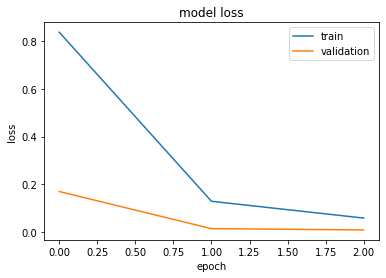

In [78]:
#loss
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

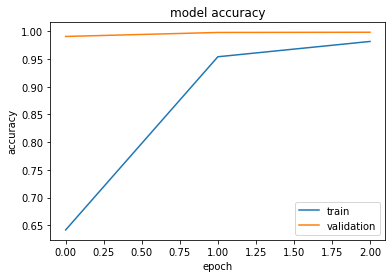

In [79]:
#accuracy
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# Loss and Accuracy 

In [80]:
model.evaluate(X_val_encoded_padded_words, y_val)

79/79 [==============================] - 0s 5ms/step - loss: 0.0081 - accuracy: 0.9984


[0.008089067414402962, 0.9983999729156494]

# Predictions 

In [81]:
def predict(text):
    sentence = text
    tokens = Tokenizer.texts_to_sequences([text])
    tokens = pad_sequences(tokens, maxlen = 100)
    prediction = model.predict(np.array(tokens))
    pred = np.argmax(prediction)
    classes = ['BookRestaurant','GetWeather','PlayMusic','RateBook']
    result = classes[pred]
    return pred,result

In [82]:
predict("is it raining ?")

(1, 'GetWeather')

In [83]:
predict("i would like to book a table at hotel Orion for 29th june")

(0, 'BookRestaurant')

In [84]:
predict("An Artist released a new music album ")

(2, 'PlayMusic')

In [89]:
predict("this novel deserves a rating of 10")

(3, 'RateBook')

Medium Article: https://medium.com/ai-techsystems/intent-classification-using-lstm-5067d283c10a